In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [2]:
#Loads the CSV file
#Confirms successful loading
#Shows first 5 rows


df = pd.read_csv(r"C:\Users\kamir\slk projects\Naive Bayes\heart_disease_uci.csv")

print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
#Converts text columns like “Male/Female”, “Flat/Up/Down” into numbers
#Naive Bayes needs numerical inputs


le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [4]:
#Removes unnecessary columns that don’t affect prediction
#Keeps the model clean and accurate


for col in ["id", "dataset"]:
    if col in df.columns:
        df = df.drop(col, axis=1)


In [5]:
#Convert Target Column to Binary
#The dataset originally has:
#0 = healthy
#1,2,3,4 = different levels of disease


df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


In [6]:
df = df.fillna(df.median(numeric_only=True))


In [7]:

#Separate Features (X) and Target (y)
X = df.drop("num", axis=1)
y = df["num"]


In [8]:
#Split Training & Testing Sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [9]:
#Feature Scaling (Important for Naive Bayes)
#Prevents large numbers from dominating small numbers

#Improves model accuracy

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
#Train the Naive Bayes Model
#Creates Naive Bayes classifier
#Fits the model on training data

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)


,priors,None
,var_smoothing,1e-09


Naive Bayes Accuracy: 0.7934782608695652


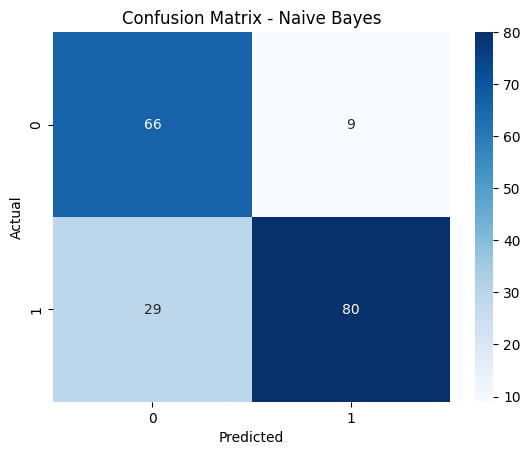


Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.88      0.78        75
           1       0.90      0.73      0.81       109

    accuracy                           0.79       184
   macro avg       0.80      0.81      0.79       184
weighted avg       0.82      0.79      0.80       184



In [11]:
y_pred = nb.predict(X_test_scaled)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
"""
Shows how many predictions were correct
the  accuracy ≈ 0.79 (79%)

"""


In [12]:
sample = {
    "age": 55,
    "sex": 1,
    "cp": 0,
    "trestbps": 130,
    "chol": 250,
    "fbs": 0,
    "restecg": 1,
    "thalch": 150,   # Correct column name
    "exang": 0,
    "oldpeak": 1.2,
    "slope": 2,
    "ca": 0,
    "thal": 2
}



In [13]:
sample_df = pd.DataFrame([sample])
sample_scaled = scaler.transform(sample_df)

result = nb.predict(sample_scaled)[0]

print("Prediction:", "Heart Disease (1)" if result == 1 else "No Heart Disease (0)")


Prediction: No Heart Disease (0)
